In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df_index = pd.read_csv('economic_index.csv')
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [9]:
df_index.drop( columns=['Unnamed: 0','year','month'],axis=1,inplace=True)


In [10]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [11]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

/home/ashertopaz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ashertopaz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ashertopaz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


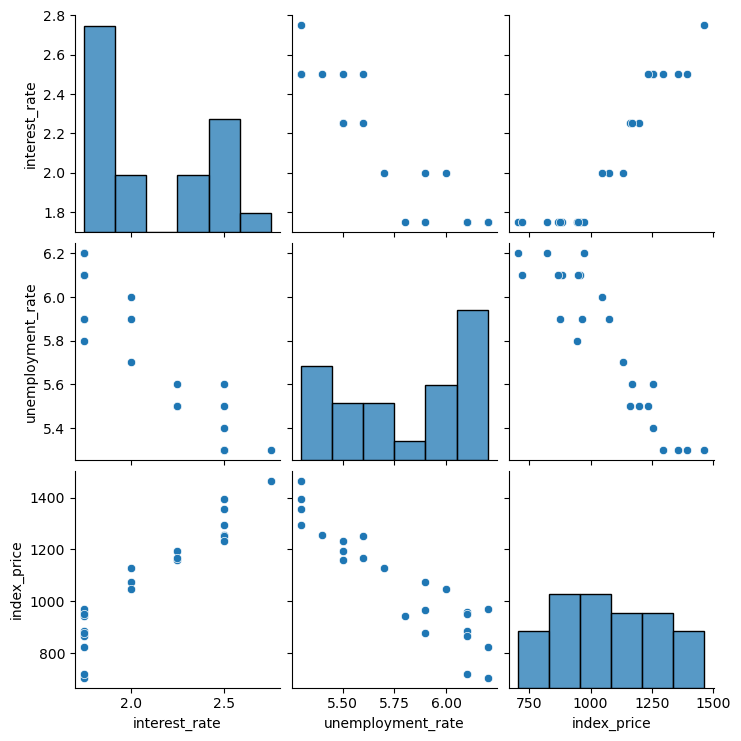

In [12]:
sns.pairplot(df_index)

In [13]:

#index price and interest have a positive correlation
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unepmployment_rate')

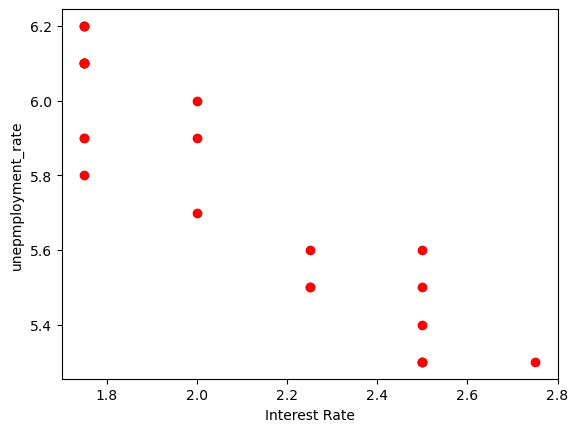

In [16]:
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color = 'r')
plt.xlabel('Interest Rate')
plt.ylabel('unepmployment_rate')

In [18]:
#independent and dependent features
X = df_index.iloc[:,:-1]
y = df_index.iloc[:,-1]
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [22]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [26]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train

array([[ 0.55339859, -0.53244666],
       [-0.9486833 ,  0.41597395],
       [ 1.30443953, -1.48086727],
       [-0.9486833 ,  1.36439457],
       [ 1.30443953, -0.53244666],
       [ 1.30443953, -1.48086727],
       [-0.19764235,  0.73211416],
       [-0.9486833 ,  1.04825436],
       [ 1.30443953, -1.48086727],
       [ 1.30443953, -1.16472707],
       [-0.9486833 ,  1.36439457],
       [-0.9486833 ,  1.04825436],
       [-0.9486833 ,  0.41597395],
       [-0.9486833 ,  1.04825436],
       [ 0.55339859, -0.84858687],
       [-0.19764235, -0.21630646],
       [-0.9486833 ,  0.09983375],
       [-0.9486833 ,  1.04825436],
       [ 1.30443953, -0.84858687]])

In [27]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()


In [28]:
regression.fit(X_train, y_train)

LinearRegression()

In [30]:
#validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train,scoring = 'neg_mean_squared_error',cv=3)

validation_score


array([-4304.75412833, -7608.56499271, -5108.77588052])

In [31]:
np.mean(validation_score)

-5674.031667186765

In [ ]:
#prediction


In [33]:
y_pred = regression.predict(X_test)
y_pred

array([1192.92068422,  846.6908733 , 1374.53556008,  879.61386031,
       1003.34428525])

In [35]:
#performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)

mse
mae

64.74722105636565

In [36]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

0.8507000324705942


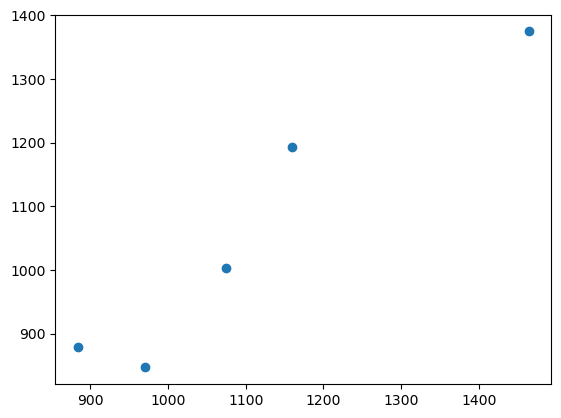

In [37]:
#assumptions
plt.scatter(y_test,y_pred)

In [38]:
residuals = y_test - y_pred
residuals

8     -33.920684
16    124.309127
0      89.464440
18      4.386140
11     71.655715
Name: index_price, dtype: float64

/home/ashertopaz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


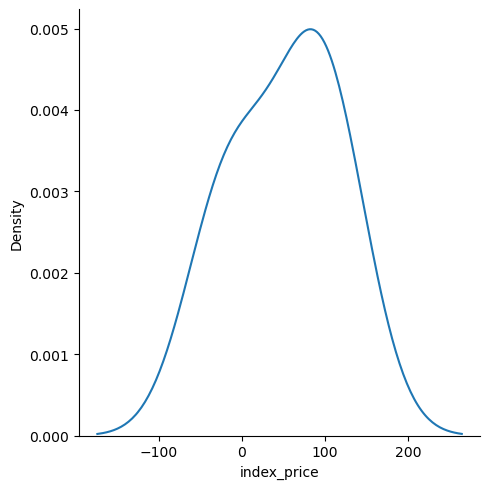

In [39]:
sns.displot(residuals,kind='kde')